# Installing PyGWinC tool

In [ ]:
pip install gwinc

# Importing the essential libraries

In [3]:
import gwinc
import numpy as np
import matplotlib.pyplot as plt
from gwinc import Struct

# Printing parameters of aLIGO

## Printing parameters and structure within each!

In [6]:
print("Parameters present in ifo structure:")
print(budget.ifo.keys())

Parameters present in ifo structure:
dict_keys(['Infrastructure', 'TCS', 'Seismic', 'Atmospheric', 'Suspension', 'Materials', 'Laser', 'Optics', '_orig_keys'])


In [7]:
print("\n--- Infrastructure ---")
print(budget.ifo.Infrastructure)

print("\n--- Suspension ---")
print(budget.ifo.Suspension)

print("\n--- Materials ---")
print(budget.ifo.Materials)

print("\n--- Laser System ---")
print(budget.ifo.Laser)

print("\n--- Optics ---")
print(budget.ifo.Optics)



--- Infrastructure ---
<GWINC Struct: ['Length', 'Temp', 'ResidualGas']>

--- Suspension ---
<GWINC Struct: ['Type', 'FiberType', 'BreakStress', 'Temp', 'Silica', 'C70Steel', 'MaragingSteel', 'Silicon', 'Stage', 'Ribbon', 'Fiber']>

--- Materials ---
<GWINC Struct: ['MassRadius', 'MassThickness', 'Coating', 'Substrate']>

--- Laser System ---
<GWINC Struct: ['Wavelength', 'Power']>

--- Optics ---
<GWINC Struct: ['Type', 'PhotoDetectorEfficiency', 'Loss', 'BSLoss', 'coupling', 'SubstrateAbsorption', 'pcrit', 'Quadrature', 'ITM', 'ETM', 'PRM', 'SRM', 'Curvature']>


# Modifying Parameters -- ARM LENGTH

In [20]:
print("Arm Length:", budget.ifo.Infrastructure.Length , 'm')

Arm Length: 3995 m


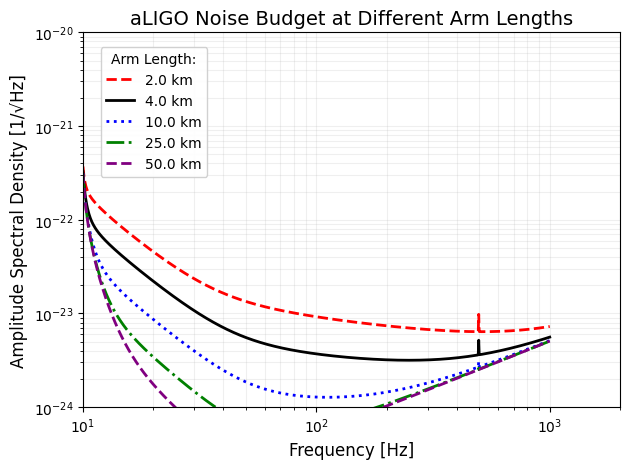

In [22]:
# Different values of Arm lengths (in meters)
arm_lengths = [2000, 3995, 10000, 25000, 5.0e4]  # Baseline (±) 4 variations
colors = ['red', 'black', 'blue', 'green', 'purple']  
linestyles = ['--', '-', ':', '-.', '--']  


plt.figure()

# Calculating and plotting for each arm length value
for length, color, ls in zip(arm_lengths, colors, linestyles):
    # Load fresh aLIGO budget each time
    budget = gwinc.load_budget('aLIGO')
    
   
    budget.ifo.Infrastructure.Length = length
    
    
    scale_factor = length / 3995  # Relative to aLIGO baseline
    budget.ifo.Optics.Curvature.ITM = 1934 * scale_factor
    budget.ifo.Optics.Curvature.ETM = 2245 * scale_factor
    
    
    trace = budget.run(freq=freq)
    
    # Plotting total noise
    plt.loglog(trace.freq, np.sqrt(trace.psd), 
               label=f'{length/1000:.1f} km', 
               color=color,
               linestyle=ls,
               linewidth=2)


plt.title('aLIGO Noise Budget at Different Arm Lengths', fontsize=14)
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('Amplitude Spectral Density [1/√Hz]', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.legend(fontsize=10, title='Arm Length:',
           bbox_to_anchor=(0.02, 0.98),
           framealpha=0.9)


plt.xlim(10, 2000)  
plt.ylim(1e-24, 1e-20)
plt.tight_layout()
plt.show()

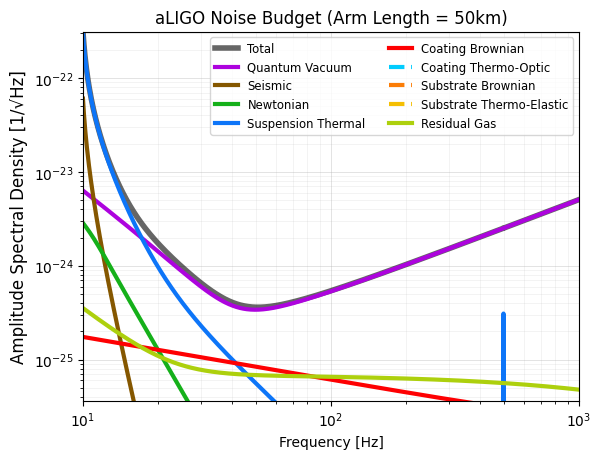

In [23]:
# Loading a new budget for 5000 m arm length
length_budget = gwinc.load_budget('aLIGO')

# Updated arm length to 50km
length_budget.ifo.Infrastructure.Length = 5.0e4


scale_factor = 5.0e4 / 3995
length_budget.ifo.Optics.Curvature.ITM = 1934 * scale_factor
length_budget.ifo.Optics.Curvature.ETM = 2245 * scale_factor


trace_length = length_budget.run(freq=freq)
fig, ax = plt.subplots()
trace_length.plot(ax=ax)
ax.set_title('aLIGO Noise Budget (Arm Length = 50km)')
plt.ylabel('Amplitude Spectral Density [1/√Hz]', fontsize=12)
plt.show()

# Modifying Parameters -- LASER POWER

In [12]:
print("Laser Power:", budget.ifo.Laser.Power , 'W')

Laser Power: 2500 W


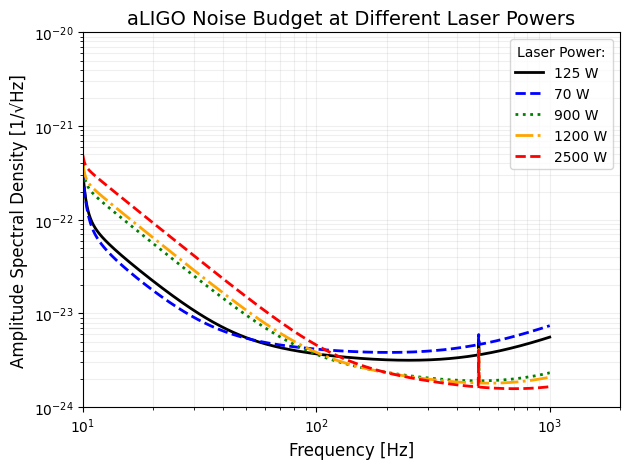

In [21]:
# Define frequency range
freq = np.logspace(1, 3, 1000)  # 10Hz to 1kHz

# Laser powers to test (in Watts)
powers = [125, 70, 900, 1200, 2500]  # Baseline (±) 4 variations
colors = ['black', 'blue', 'green', 'orange', 'red']  # Colors for each curve
linestyles = ['-', '--', ':', '-.', '--']  # Line styles for clarity

# Create figure
plt.figure()

# Calculate and plot for each power level
for power, color, ls in zip(powers, colors, linestyles):
    # Load fresh aLIGO budget each time
    budget = gwinc.load_budget('aLIGO')
    
    # Set laser power
    budget.ifo.Laser.Power = power
    
    # Run calculation
    trace = budget.run(freq=freq)
    
    # Plot total noise
    plt.loglog(trace.freq, np.sqrt(trace.psd), 
               label=f'{power} W', 
               color=color,
               linestyle=ls,
               linewidth=2)

# Highlight key frequency bands
#plt.axvspan(30, 300, color='gray', alpha=0.1, label='BNS Range (30-300 Hz)')
#plt.axvspan(300, 1000, color='blue', alpha=0.05, label='BBH Range (300-1000 Hz)')

# Formatting
plt.title('aLIGO Noise Budget at Different Laser Powers', fontsize=14)
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('Amplitude Spectral Density [1/√Hz]', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10, title='Laser Power:')
plt.xlim(10, 2000)  # Focus on most sensitive band
plt.ylim(1e-24, 1e-20)

plt.tight_layout()
plt.show()

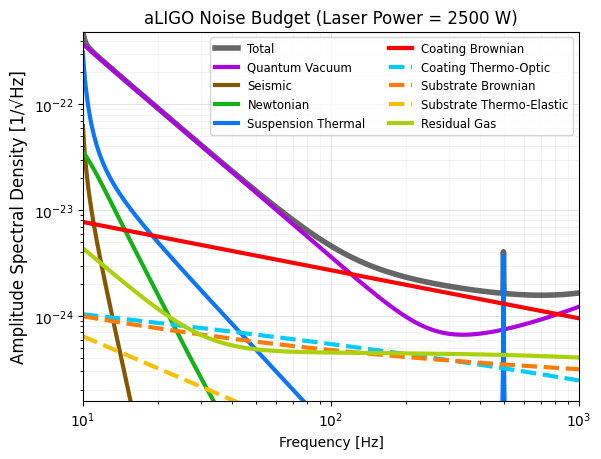

In [18]:
power_budget = gwinc.load_budget('aLIGO')

power_budget.ifo.Laser.Power = 2500


# Running and plotting new budget
trace_power = power_budget.run(freq=freq)
fig, ax = plt.subplots()
trace_power.plot(ax=ax)
ax.set_title('aLIGO Noise Budget (Laser Power = 2500 W)')
plt.ylabel('Amplitude Spectral Density [1/√Hz]', fontsize=12)
plt.show()